/var/folders/ty/th__2_pn1js9hzn2y7l830wr0000gn/T/ipykernel_76467/1389261178.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(prices_array))  # 使用 'tab20' 顏色映射，有足夠顏色


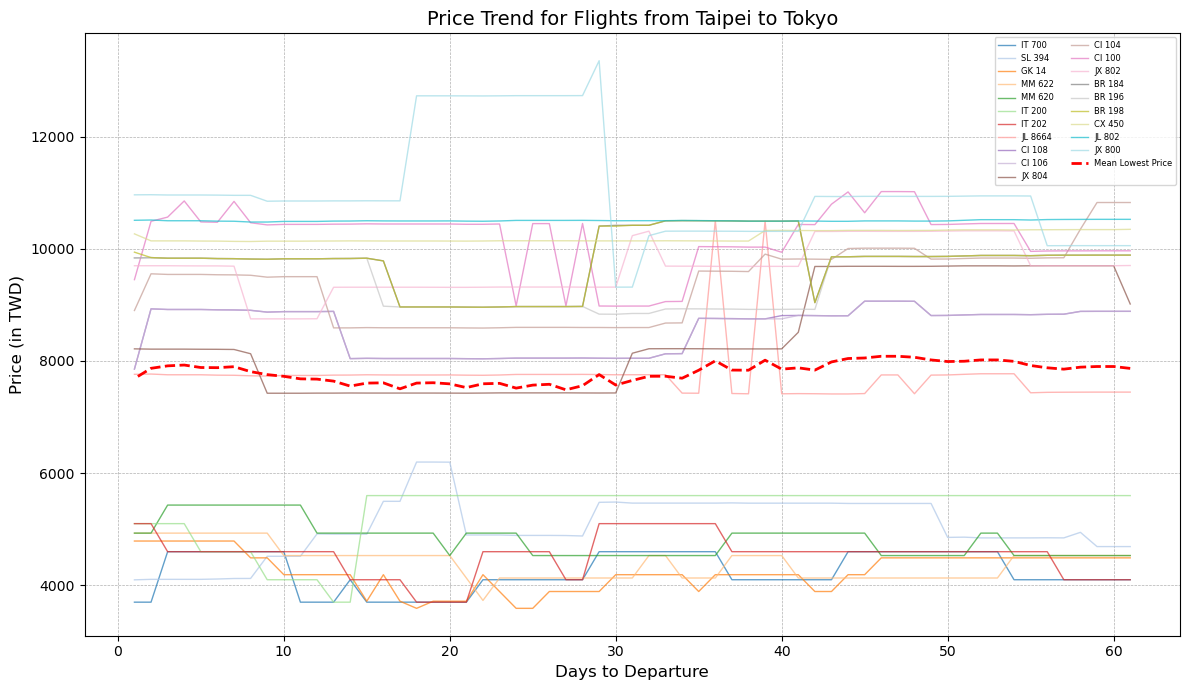

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = '/Users/yuchingchen/Documents/專題/data/google_flights_data_final_nrt.csv'
data = pd.read_csv(file_path)

# 提取 "航班代碼" 和 "價格歷史" 欄位
flight_codes = data['航班代碼']
price_history_data = data['價格歷史']

# 定義提取價格的函數
def extract_prices(price_history):
    if isinstance(price_history, str):  # 確保數據是字串
        # 使用正則表達式提取價格，匹配 $後的數字
        return [int(price.replace(',', '')) for price in re.findall(r'\$(\d+,\d+|\d+)', price_history)]
    return []

# 對價格歷史應用提取函數
price_data = price_history_data.apply(extract_prices)

# 濾除掉價格數據不完整的航班（即不等於 61 天的數據），同時移除 NaN
price_data = price_data[price_data.apply(lambda x: len(x) == 61 and isinstance(x, list) and x != [])]  # 保留有 61 天數據且非空列表
flight_codes = flight_codes[price_data.index]  # 對應的航班代碼

# 將列表轉換為 NumPy 陣列
prices_array = np.array(price_data.tolist())

# 計算所有航班的平均價格
mean_prices = np.mean(prices_array, axis=0)

# 確保 mean_prices 是一維的，並且有 61 個元素
mean_prices = np.squeeze(mean_prices)

# 生成顏色映射（使用 plt.cm）
colors = plt.cm.get_cmap('tab20', len(prices_array))  # 使用 'tab20' 顏色映射，有足夠顏色

# 繪製價格趨勢圖
plt.figure(figsize=(12, 7))

# 畫出每個航班的價格趨勢，並標註航班代碼
for idx, flight_prices in enumerate(prices_array):
    plt.plot(np.arange(61, 0, -1), flight_prices, color=colors(idx / (len(prices_array) - 1)), alpha=0.7, lw=1, label=flight_codes.iloc[idx])

# 畫出均價趨勢（紅色虛線）
plt.plot(np.arange(61, 0, -1), mean_prices, 'r--', lw=2, label='Mean Lowest Price', markersize=5)

# 標籤與標題
plt.xlabel('Days to Departure', fontsize=12)
plt.ylabel('Price (in TWD)', fontsize=12)
plt.title('Price Trend for Flights from Taipei to Tokyo', fontsize=14)

# 設定圖例分成兩列
plt.legend(fontsize=6, loc='upper right', ncol=2)

# 美化圖形
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 顯示圖形
plt.tight_layout()
plt.show()

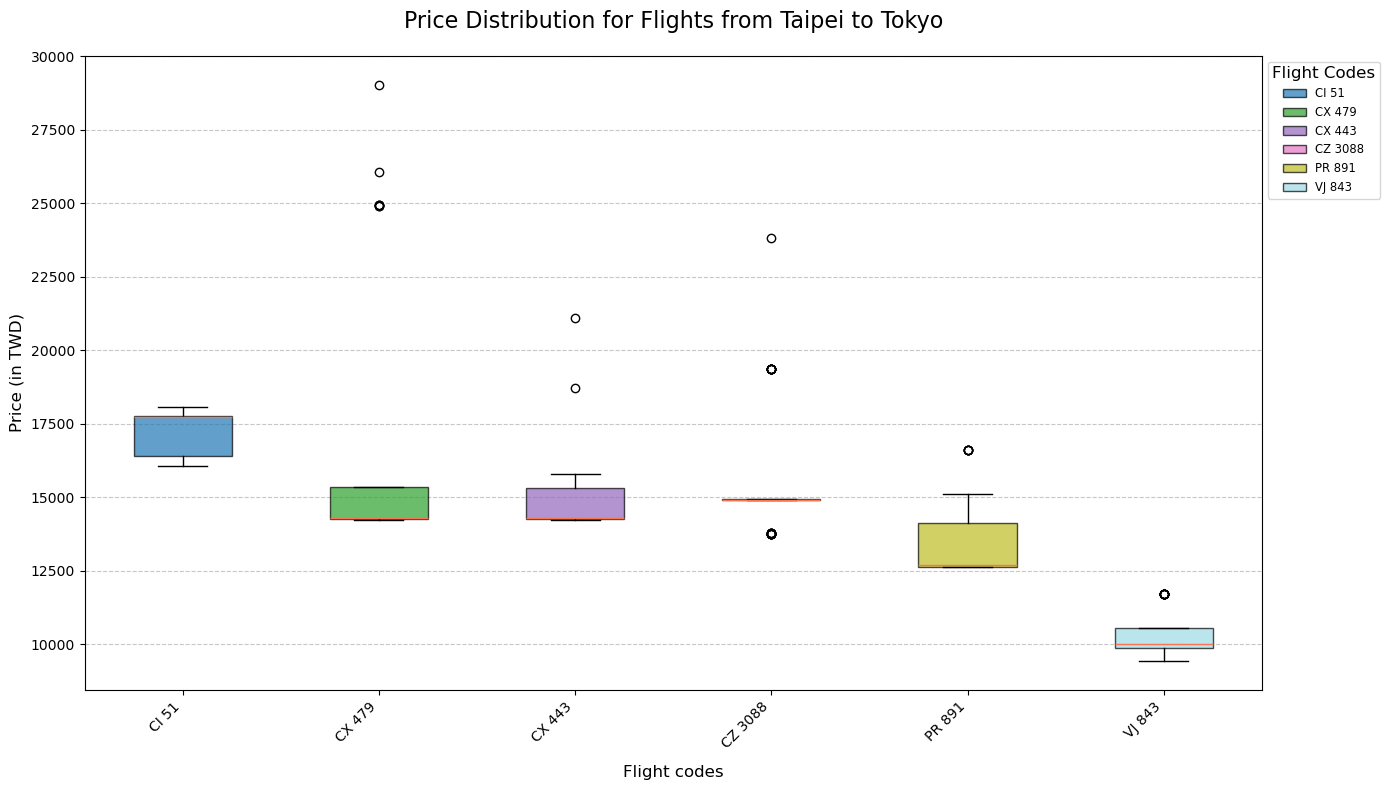

In [147]:
# 創建箱型圖
plt.figure(figsize=(14, 8))

# 創建箱型圖
bplot = plt.boxplot(prices_array.T, 
                    patch_artist=True,
                    meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick'))

# 自定義箱型圖顏色
colors = plt.cm.tab20(np.linspace(0, 1, len(flight_codes)))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 添加標籤與標題
plt.xlabel('Flight codes', fontsize=12, labelpad=10)
plt.ylabel('Price (in TWD)', fontsize=12)
plt.title('Price Distribution for Flights from Taipei to Tokyo', fontsize=16, pad=20)

# 調整X軸標籤
plt.xticks(range(1, len(flight_codes) + 1), flight_codes, rotation=45, ha='right')

# 添加網格線
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 添加圖例，將圖例放在箱型圖外部
plt.legend(handles=bplot['boxes'], labels=flight_codes.tolist(), title='Flight Codes', 
           title_fontsize='large', fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))

# 調整佈局並顯示圖形
plt.tight_layout()
plt.show()

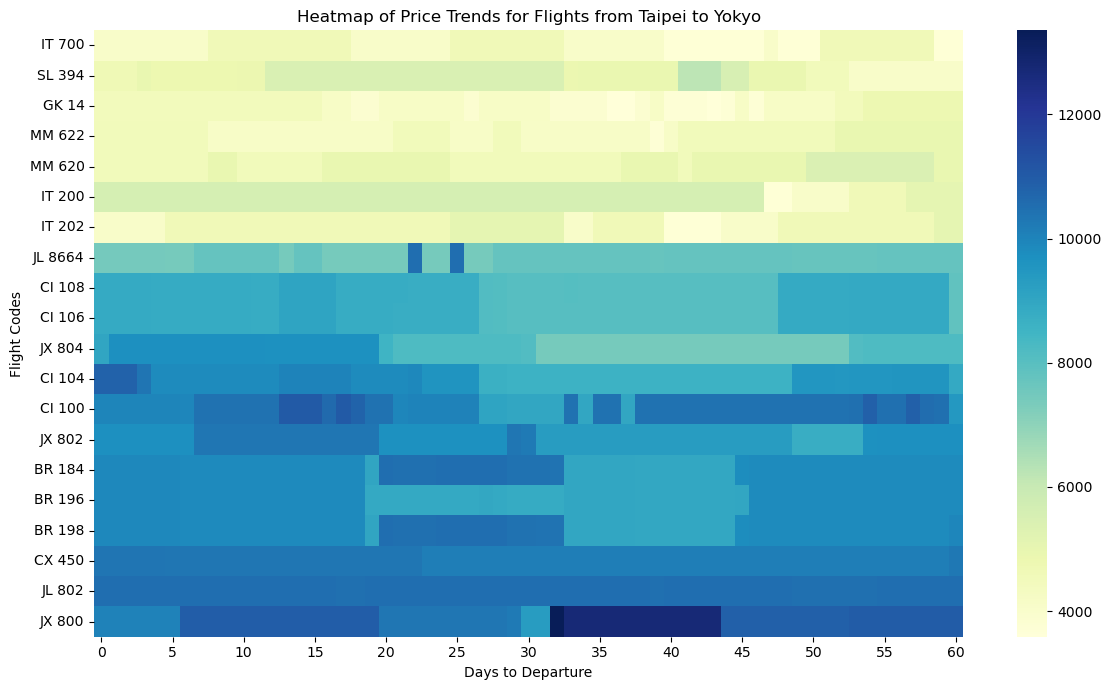

In [143]:
# 熱圖
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(prices_array, cmap="YlGnBu", xticklabels=5, yticklabels=flight_codes)
plt.title('Heatmap of Price Trends for Flights from Taipei to Yokyo')
plt.xlabel('Days to Departure')
plt.ylabel('Flight Codes')
plt.tight_layout()
plt.show()

/var/folders/ty/th__2_pn1js9hzn2y7l830wr0000gn/T/ipykernel_76467/2158915332.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(prices_array))  # 使用 'tab20' 顏色映射，有足夠顏色


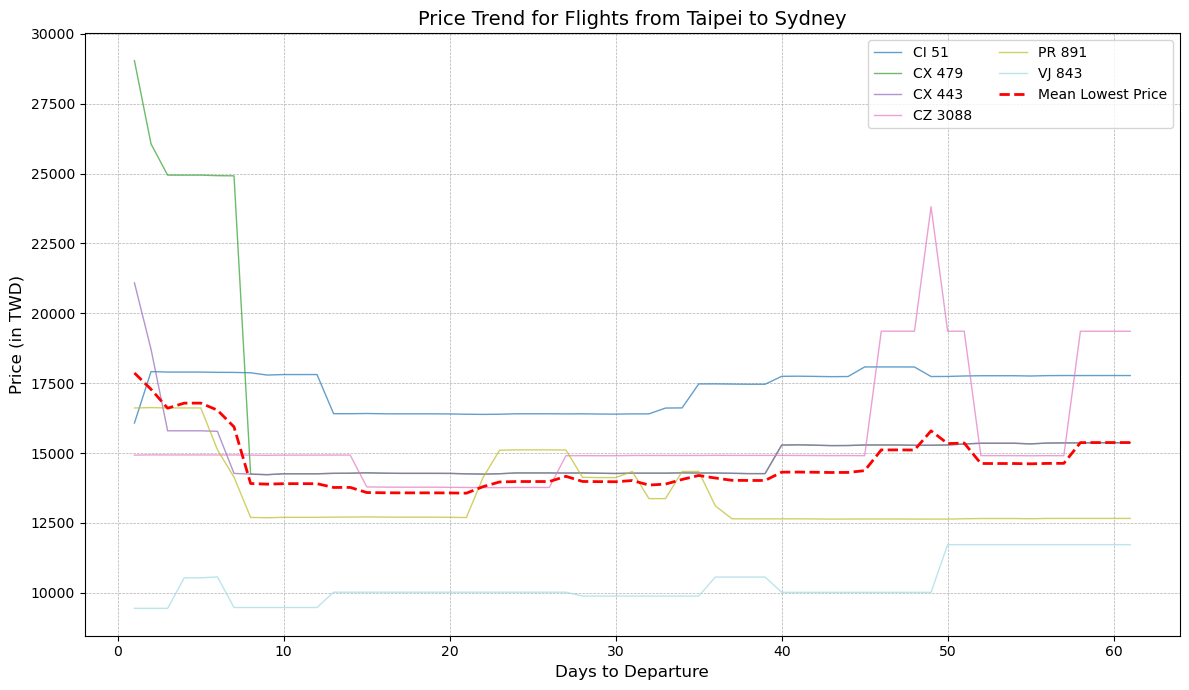

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = '/Users/yuchingchen/Documents/專題/data/google_flights_data_final_syd.csv'
data = pd.read_csv(file_path)

# 提取 "航班代碼" 和 "價格歷史" 欄位
flight_codes = data['航班代碼']
price_history_data = data['價格歷史']

# 定義提取價格的函數
def extract_prices(price_history):
    if isinstance(price_history, str):  # 確保數據是字串
        # 使用正則表達式提取價格，匹配 $後的數字
        return [int(price.replace(',', '')) for price in re.findall(r'\$(\d+,\d+|\d+)', price_history)]
    return []

# 對價格歷史應用提取函數
price_data = price_history_data.apply(extract_prices)

# 濾除掉價格數據不完整的航班（即不等於 61 天的數據），同時移除 NaN
price_data = price_data[price_data.apply(lambda x: len(x) == 61 and isinstance(x, list) and x != [])]  # 保留有 61 天數據且非空列表
flight_codes = flight_codes[price_data.index]  # 對應的航班代碼

# 將列表轉換為 NumPy 陣列
prices_array = np.array(price_data.tolist())

# 計算所有航班的平均價格
mean_prices = np.mean(prices_array, axis=0)

# 確保 mean_prices 是一維的，並且有 61 個元素
mean_prices = np.squeeze(mean_prices)

# 生成顏色映射（使用 plt.cm）
colors = plt.cm.get_cmap('tab20', len(prices_array))  # 使用 'tab20' 顏色映射，有足夠顏色

# 繪製價格趨勢圖
plt.figure(figsize=(12, 7))

# 畫出每個航班的價格趨勢，並標註航班代碼
for idx, flight_prices in enumerate(prices_array):
    plt.plot(np.arange(61, 0, -1), flight_prices, color=colors(idx / (len(prices_array) - 1)), alpha=0.7, lw=1, label=flight_codes.iloc[idx])

# 畫出均價趨勢（紅色虛線）
plt.plot(np.arange(61, 0, -1), mean_prices, 'r--', lw=2, label='Mean Lowest Price', markersize=5)

# 標籤與標題
plt.xlabel('Days to Departure', fontsize=12)
plt.ylabel('Price (in TWD)', fontsize=12)
plt.title('Price Trend for Flights from Taipei to Sydney', fontsize=14)

# 設定圖例分成兩列
plt.legend(fontsize=10, loc='upper right', ncol=2)

# 美化圖形
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 顯示圖形
plt.tight_layout()
plt.show()

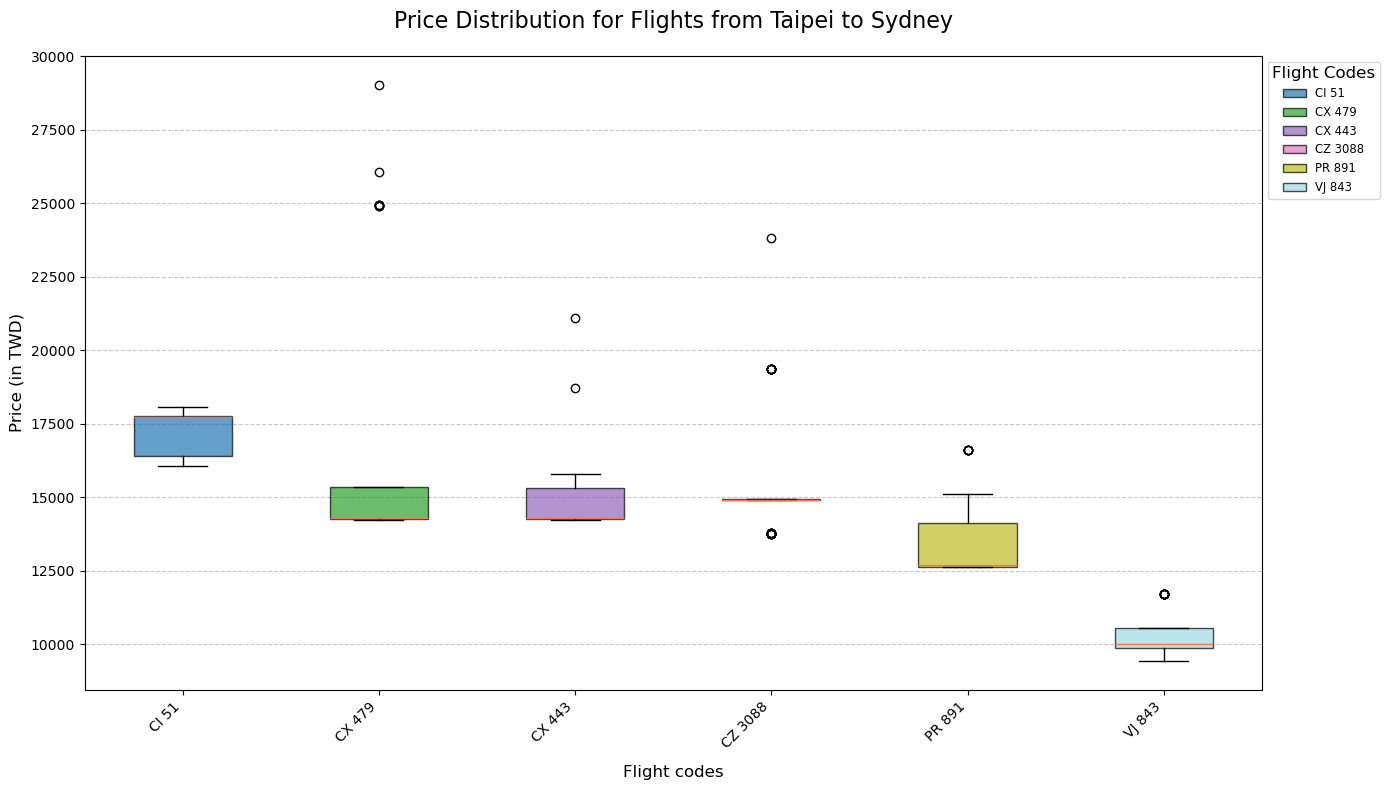

In [148]:
# 創建箱型圖
plt.figure(figsize=(14, 8))

# 創建箱型圖
bplot = plt.boxplot(prices_array.T, 
                    patch_artist=True,
                    meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick'))

# 自定義箱型圖顏色
colors = plt.cm.tab20(np.linspace(0, 1, len(flight_codes)))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 添加標籤與標題
plt.xlabel('Flight codes', fontsize=12, labelpad=10)
plt.ylabel('Price (in TWD)', fontsize=12)
plt.title('Price Distribution for Flights from Taipei to Sydney', fontsize=16, pad=20)

# 調整X軸標籤
plt.xticks(range(1, len(flight_codes) + 1), flight_codes, rotation=45, ha='right')

# 添加網格線
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 添加圖例，將圖例放在箱型圖外部
plt.legend(handles=bplot['boxes'], labels=flight_codes.tolist(), title='Flight Codes', 
           title_fontsize='large', fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))

# 調整佈局並顯示圖形
plt.tight_layout()
plt.show()

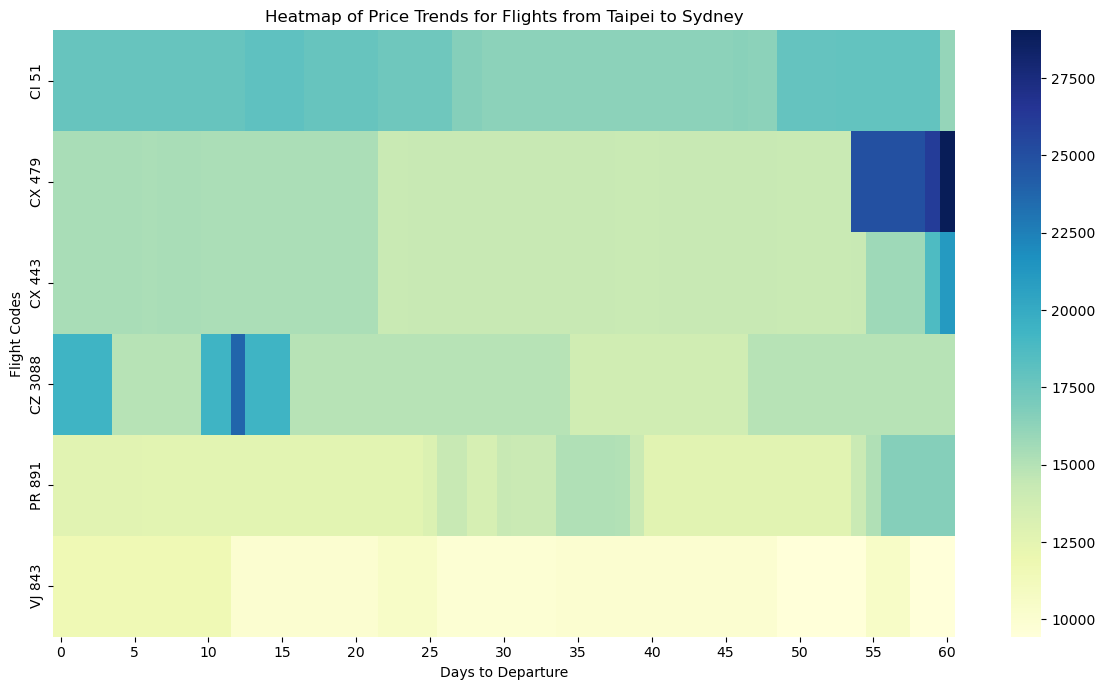

In [146]:
# 熱圖 (Heatmap)
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(prices_array, cmap="YlGnBu", xticklabels=5, yticklabels=flight_codes)
plt.title('Heatmap of Price Trends for Flights from Taipei to Sydney')
plt.xlabel('Days to Departure')
plt.ylabel('Flight Codes')
plt.tight_layout()
plt.show()

In [ ]:
# 看歷史價格
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import numpy as np

# Load the CSV file
filtered_data = pd.read_csv('google_flights_data_nrt_1220.csv')

# 創建一個空字典來存放每個航班的價格歷史
price_trends = {}
all_prices = []

# 處理每個航班的價格歷史
for index, row in filtered_data.iterrows():
    flight_code = row['航班代碼']
    price_history = row['價格歷史']
    
    if pd.isna(price_history):
        continue  # 跳過沒有價格歷史的航班
    
    # 定義提取價格的函數
    def extract_prices(price_history):
        if isinstance(price_history, str):  # 確保數據是字串
            # 使用正則表達式提取價格，匹配格式「月/日 - $價錢」
            return re.findall(r'(\d{2}/\d{2}) - \$(\d+,\d+|\d+)', price_history)
        return []

    # 提取日期和價格
    matches = extract_prices(price_history)
    
    if matches:
        dates = []
        prices = []
        for match in matches:
            date_str, price = match
            price = int(price.replace(",", ""))  # 去除價格中的逗號並轉為整數
            
            # 假設年份為 2024，轉換日期格式
            date = datetime.strptime(f"2024/{date_str}", "%Y/%m/%d")
            dates.append(date)  # 儲存日期
            prices.append(price)  # 儲存價格
        
        # 儲存價格趨勢
        price_trends[flight_code] = (np.array(dates), np.array(prices))
        all_prices.extend(prices)  # 把每個航班的價格加到總體價格列表中

# 計算所有航班價格的總體四分位數範圍
all_prices = np.array(all_prices)
Q1 = np.percentile(all_prices, 25)
Q3 = np.percentile(all_prices, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 剔除離群值的航班
filtered_price_trends = {flight_code: (dates, prices) for flight_code, (dates, prices) in price_trends.items() if not any(prices < lower_bound) and not any(prices > upper_bound)}

# 繪製價格趨勢圖
plt.figure(figsize=(14, 8))

# 使用 'tab20' 顏色映射
colors = plt.get_cmap('tab20', len(filtered_price_trends))

for idx, (flight_code, (dates, prices)) in enumerate(filtered_price_trends.items()):
    # 獲取顏色
    line_color = colors(idx / (len(filtered_price_trends) - 1))

    # 繪製價格趨勢
    plt.plot(dates, prices, color=line_color, label=flight_code, lw=1.5, alpha=0.7)

    # 找到每個航班的最低點和最高點
    min_price = np.min(prices)
    max_price = np.max(prices)
    min_date = dates[np.argmin(prices)]
    max_date = dates[np.argmax(prices)]
    
    # 用與航班趨勢線相同的顏色標記最低點和最高點
    plt.scatter(min_date, min_price, color=line_color, marker='o', s=50, alpha=0.3)  # 最低點
    plt.scatter(max_date, max_price, color=line_color, marker='o', s=50, alpha=0.5)  # 最高點

# 計算各日期的平均最低價格
all_dates = sorted(list(set([date for dates, prices in filtered_price_trends.values() for date in dates])))
mean_prices = []

for date in all_dates:
    daily_prices = []
    for flight_code, (dates, prices) in filtered_price_trends.items():
        # 檢查日期是否存在於航班的日期中，並安全提取價格
        if date in dates:
            idx = np.where(dates == date)[0]
            if len(idx) > 0:
                daily_prices.append(prices[idx[0]])
    
    if daily_prices:  # 如果當天有價格數據
        mean_prices.append(sum(daily_prices) / len(daily_prices))

# 繪製平均最低價格趨勢
plt.plot(all_dates, mean_prices, 'r--', label="Mean Lowest Price", lw=2)

# 設定圖表標題和軸標籤
plt.title("Price Trend for Flights from Taipei to Tokyo", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (in TWD)", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# 美化圖形
plt.tight_layout()

# 顯示圖表
plt.show()

In [ ]:
# 看波動
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import numpy as np
from matplotlib import font_manager

plt.rcParams['font.family'] = 'Arial Unicode MS'  # 或 'PingFang TC'

# Load the CSV file
filtered_data = pd.read_csv('google_flights_data_nrt_1220.csv')

# 創建一個空字典來存放每個航班的價格歷史
price_trends = {}
all_prices = []
flight_data = []

# 處理每個航班的價格歷史
for index, row in filtered_data.iterrows():
    flight_code = row['航班代碼']
    price_history = row['價格歷史']
    
    if pd.isna(price_history):
        continue  # 跳過沒有價格歷史的航班
    
    # 定義提取價格的函數
    def extract_prices(price_history):
        if isinstance(price_history, str):  # 確保數據是字串
            # 使用正則表達式提取價格，匹配格式「月/日 - $價錢」
            return re.findall(r'(\d{2}/\d{2}) - \$(\d+,\d+|\d+)', price_history)
        return []

    # 提取日期和價格
    matches = extract_prices(price_history)
    
    if matches:
        dates = []
        prices = []
        for match in matches:
            date_str, price = match
            price = int(price.replace(",", ""))  # 去除價格中的逗號並轉為整數
            
            # 假設年份為 2024，轉換日期格式
            date = datetime.strptime(f"2024/{date_str}", "%Y/%m/%d")
            dates.append(date)  # 儲存日期
            prices.append(price)  # 儲存價格
        
        # 儲存價格趨勢
        price_trends[flight_code] = (np.array(dates), np.array(prices))
        all_prices.extend(prices)  # 把每個航班的價格加到總體價格列表中

        # 找到每個航班的最低點和最高點
        min_price = np.min(prices)
        max_price = np.max(prices)
        min_date = dates[np.argmin(prices)]
        max_date = dates[np.argmax(prices)]
        
        # 存入航班價格數據
        flight_data.append({
            "航班代碼": flight_code,
            "最低價日期": min_date.strftime('%Y-%m-%d'),
            "最低價": min_price,
            "最高價日期": max_date.strftime('%Y-%m-%d'),
            "最高價": max_price
        })

# 將資料轉換為 DataFrame
df = pd.DataFrame(flight_data)

# 計算價格波動範圍
df['波動範圍'] = df['最高價'] - df['最低價']

# 計算波動率（相對於最低價的百分比）
df['波動率 (%)'] = (df['波動範圍'] / df['最低價']) * 100

# 按照波動範圍排序
df_sorted = df.sort_values(by='波動範圍', ascending=False)

# 如果需要可視化，可以根據波動範圍繪製圖表
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['航班代碼'], df_sorted['波動範圍'], color='skyblue')
plt.xlabel('波動範圍 (TWD)')
plt.ylabel('航班代碼')
plt.title('航班價格波動範圍')
plt.xticks(rotation=45, ha='right')  # 讓航班代碼可讀
plt.tight_layout()
plt.show()

# 顯示波動率
df_sorted = df.sort_values(by='波動率 (%)', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['航班代碼'], df_sorted['波動率 (%)'], color='skyblue')
plt.xlabel('波動率 (%)')
plt.ylabel('航班代碼')
plt.title('航班價格波動率')
plt.xticks(rotation=45, ha='right')  # 讓航班代碼可讀
plt.tight_layout()
plt.show()